In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

#The data
##The data set that I am working with was collected by Woods Hole Coastal and Marine Science Center, archived with the USGS Science Data Catalog. It shows the accumulation rates of mineral and organic sediment by different sites of coastal wetland in Tamba Bay, Florida. The accumulation of sediment is a key ecosystem function of these areas in the face of sea level rise.
#Here is a link to the research homepage on USGS website for reference: https://data.usgs.gov/datacatalog/data/USGS:60bfb8a4d34e86b938916d6f
##but by running the code below, the data will be automatically rendered in the jupyter notebook.


In [2]:
url= "https://www.sciencebase.gov/catalog/file/get/60bfb8a4d34e86b938916d6f?f=__disk__1e%2Ff1%2F4f%2F1ef14feff3b038ff6ccb9f4e755e71dc47835e95"
df = pd.read_csv(url)

#I created a dataframe that cherry picked the variables that I was most interested in
##There are seven sites sampled and the longitude/latitude data will position the data on a map.
##VAR=vertical accretion rate, MAR=Mass accumulation rate, CAR=Carbon accumulation rate.
df = df[['Site','Status','Lat','Lon','Elevation','VAR','MAR','CAR']].copy()
df

,Site,Status,Lat,Lon,Elevation,VAR,MAR,CAR
0,Fort de Soto,Mangrove,27.627500,-82.715883,-77.6,4.4,675.0,178.0
1,Fort de Soto,Mangrove,27.627500,-82.715883,-78.6,3,679.0,NaN
2,Fort de Soto,Mangrove,27.627500,-82.715883,-79.6,3.2,681.0,127.0
3,Fort de Soto,Mangrove,27.627500,-82.715883,-80.6,2.8,647.0,NaN
4,Fort de Soto,Mangrove,27.627500,-82.715883,-81.6,3,904.0,145.0
...,...,...,...,...,...,...,...,...
272,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,41.6,,NaN,NaN
273,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,36.6,,NaN,NaN
274,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,31.6,,NaN,NaN
275,Upper Tampa Bay,Salt Barren,28.007596,-82.631427,26.6,,NaN,NaN


##Here is a link to the metadata that will explain each variable in more detail, including the ones that I chose to admit.
##It also provides citation information
#https://www.sciencebase.gov/catalog/file/get/60bfb8a4d34e86b938916d6f?f=__disk__6c%2Fb8%2F78%2F6cb8785ea04e49b08b93128827ff41440c15671e&transform=1&allowOpen=true

In [ ]:
#For this project I had to learn how to utilize cartopy to render a base map
#with features including coastlines, borders, lakes, and rivers.
##The addition of these features requires a call within the cartopy program 
#I needed to learn about different projections used in cartopy to choose one that would not distort the localized region
##I also needed to frame the map so that it highlights the Tampa Bay area.
#I included a marker size variable that is attributed to the Mass Accumulation Rate
#The diameter of the markers correlate with the magnitude of MAR 

-82.4676
28.007596
-82.715883
27.580827


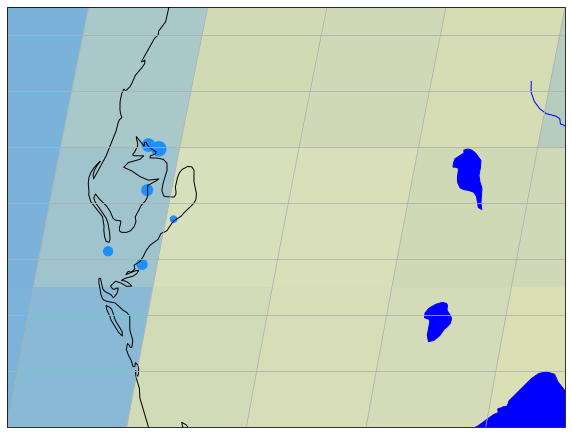

In [14]:
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_extent([ -81, -83,27, 28.5])
ax.stock_img()



#Add some nice stuff
ax.add_feature(cfeature.COASTLINE, edgecolor="black")
ax.add_feature(cfeature.BORDERS, edgecolor="black")
ax.add_feature(cfeature.LAKES, color="blue")
ax.add_feature(cfeature.RIVERS, edgecolor="blue")


ax.gridlines()

print (df.Lon.max())
print (df.Lat.max())
print (df.Lon.min())
print (df.Lat.min())

plt.scatter(x=df.Lon, y=df.Lat,
            color="dodgerblue",
            s=df.MAR/20,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important
